In [136]:
import numpy as np
from scipy.stats import binned_statistic, norm
from matplotlib import pyplot as plt
import pandas as pd

0.002745330081935363
0.006272082378736538
0.006443963487213983


Text(0, 0.5, 'Number density ($\\#/m^4$)')

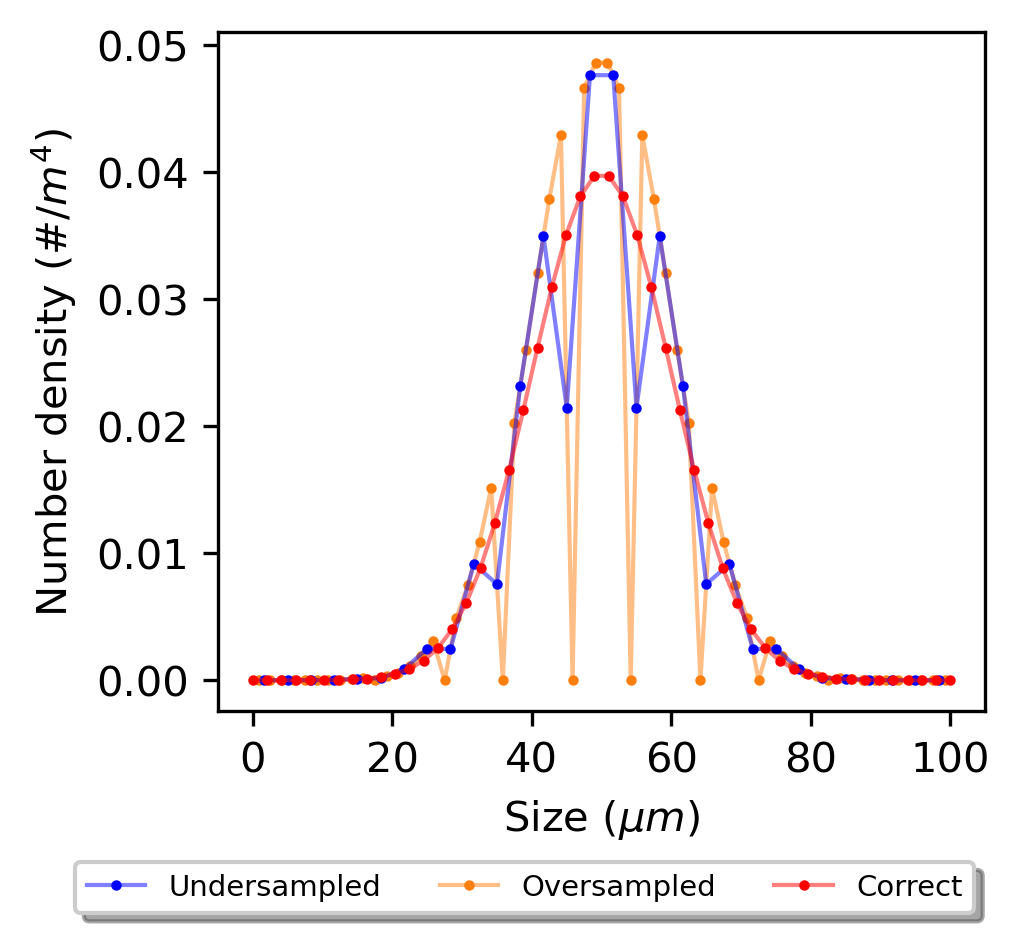

In [142]:
fig, ax = plt.subplots(figsize=(3.3,3), dpi=300, )

L = np.linspace(0, 100, 50)
val = norm.pdf(L, loc=50, scale=10)
X = L
Y = val
marker, = ax.plot(X, Y, "r.", ms=3, zorder=111)
lin, = ax.plot(X, Y, "r-", alpha=0.5, lw=1.0, zorder=111)
correctly_sampled = (marker, lin)
Y_series = pd.Series(Y)
print(Y_series.rolling(5).std().mean())

dL = L[1] - L[0]

stat, bin_edges, bin_number = binned_statistic(L,  val * dL, statistic="sum", bins=60)
g = (bin_edges[1:] + bin_edges[:-1]) * 0.5
X = g
Y = stat/(bin_edges[1:] - bin_edges[:-1])
marker, = ax.plot(X, Y, "C1.", ms=3)
lin, = ax.plot(X, Y, "C1-", alpha=0.5, lw=1.0)
oversampled = (marker, lin)
Y_series = pd.Series(Y)
print(Y_series.rolling(5).std().mean())

stat, bin_edges, bin_number = binned_statistic(L,  val * dL, statistic="sum", bins=30)
g = (bin_edges[1:] + bin_edges[:-1]) * 0.5
X = g
Y = stat/(bin_edges[1:] - bin_edges[:-1])

marker, = ax.plot(X, Y, "b.", ms=3)
lin, = ax.plot(X, Y, "b-", alpha=0.5, lw=1.0)
undersampled = (marker, lin)
Y_series = pd.Series(Y)
print(Y_series.rolling(5).std().mean())

ax.legend([undersampled, oversampled, correctly_sampled], ["Undersampled", "Oversampled", "Correct"], loc='upper center', bbox_to_anchor=(0.4, -0.2), fancybox=True, shadow=True, ncol=3, fontsize=7)
ax.set_xlabel("Size ($\mu m$)")
ax.set_ylabel("Number density ($\#/m^4$)")

# KDE

In [143]:
import KDEpy